In [2]:
from langgraph.graph import StateGraph, START,END
from typing import TypedDict, Literal

In [8]:
class QuadState(TypedDict):
    a:int
    b:int
    c:int

    equation : str
    discriminant: float
    result : str

In [25]:
def show_equation(state:QuadState):
    equation = f"{state['a']}x^2 + {state['b']}x + {state['c']}"
    return {'equation':equation}

def calculate_discriminant(state:QuadState):
    discriminant=state['b']**2-(4*state['a']*state['c'])
    return{'discriminant':discriminant}

def real_roots(state:QuadState):
    root1=(-state['b']+state['discriminant']**0.5)/(2*state['a'])
    root2=(-state['b']-state['discriminant']**0.5)/(2*state['a'])

    result=f'The roots are {root1} and {root2}'
    return{'result':result}

def repeated_roots(state:QuadState):
    root1=(-state['b']/(2*state['a']))

    result=f'The roots are {root1}'
    return{'result':result}


def no_real_roots(state:QuadState):

    result=f'The roots are no real roots'
    return{'result':result}

def check_condition(state:QuadState)->Literal['real_root','repeated_root','no_real_root']:
    if state['discriminant']>0:
        return 'real_root'
    elif state['discriminant']==0:
        return 'repeated_root'
    else:
        return 'no_real_root'




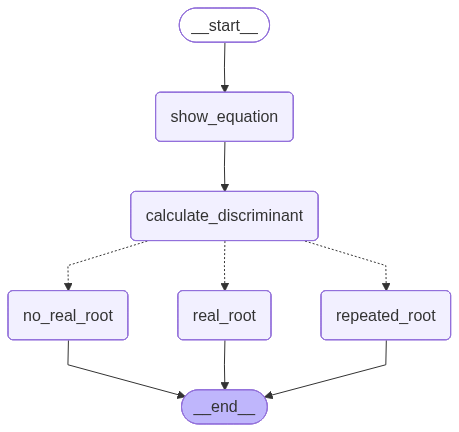

In [29]:
graph = StateGraph(QuadState)

graph.add_node('show_equation',show_equation)
graph.add_node('calculate_discriminant',calculate_discriminant)
graph.add_node('real_root',real_roots)
graph.add_node('repeated_root',repeated_roots)
graph.add_node('no_real_root',no_real_roots)


graph.add_edge(START,'show_equation')
graph.add_edge('show_equation','calculate_discriminant')
graph.add_conditional_edges('calculate_discriminant',check_condition)
#graph.add_conditional_edges('calculate_discriminant',check_condition{'real_root':'real_root','repeated_root':'repeated_root','no_real_root':'no_real_root'})
graph.add_edge('real_root',END),
graph.add_edge('repeated_root',END)
graph.add_edge('no_real_root',END)

workflow=graph.compile()
workflow

In [31]:
initial_state={
    'a':4,
    'b':2,
    'c':4
}

workflow.invoke(initial_state)

{'a': 4,
 'b': 2,
 'c': 4,
 'equation': '4x^2 + 2x + 4',
 'discriminant': -60,
 'result': 'The roots are no real roots'}